Dieses Skript visualisiert die beiden EEG Kanäle, die in `exp_02_02` visualisiert wurden. Dies ist ein Sanity Check für das Preprocessing.

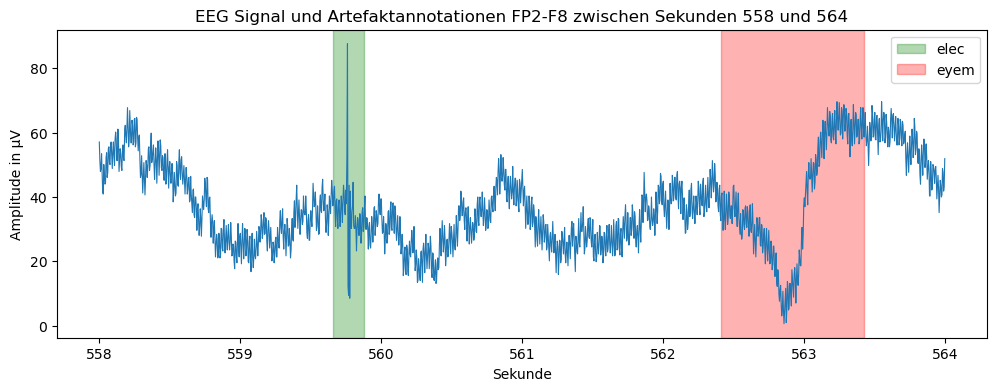

In [1]:
from utils.visualize_eeg import visualize_eeg_with_artifacts

fig = visualize_eeg_with_artifacts(
    edf_file_path="../../../../tuar_processed/unsorted/aaaaagcs_s002_t000.edf",
    csv_file_path="../../../../tuar_processed/unsorted/aaaaagcs_s002_t000.csv",
    channel='FP2-F8',
    interval_start=558,
    interval_stop=564
)
fig.savefig("output/exp_02_06_artifact_visualization_comparison_1.svg")
fig.show()

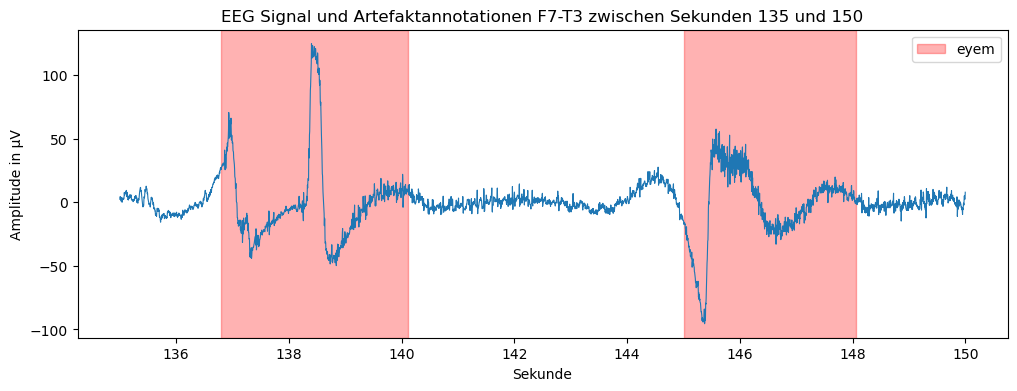

In [2]:
fig = visualize_eeg_with_artifacts(
    edf_file_path="../../../../tuar_processed/train/aaaaaaju_s005_t000.edf",
    csv_file_path="../../../../tuar_processed/train/aaaaaaju_s005_t000.csv",
    channel='F7-T3',
    interval_start=135,
    interval_stop=150
)

fig.savefig("output/exp_02_06_artifact_visualization_comparison_2.svg")
fig.show()

- Notizen
    - Die Daten scheinen mit den vorherigen Plots übereinzustimmen und der Sanity Check ist bestanden.
    - Man sieht, dass das Signal etwas geglättet wurde, aber seine grundlegende Struktur immer noch beibehalten hat.

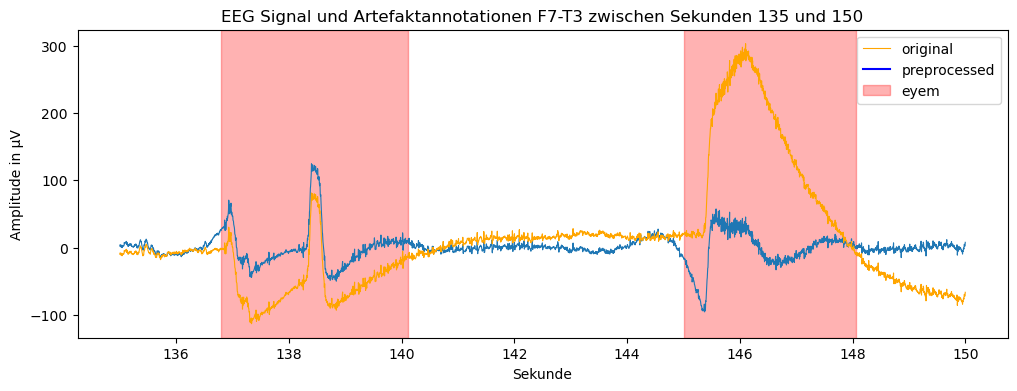

In [3]:
from utils.visualize_eeg import visualize_eeg_with_artifacts
import pyedflib
import numpy as np
from matplotlib.patches import Patch

fig = visualize_eeg_with_artifacts(
    edf_file_path="../../../../tuar_processed/train/aaaaaaju_s005_t000.edf",
    csv_file_path="../../../../tuar_processed/train/aaaaaaju_s005_t000.csv",
    channel='F7-T3',
    interval_start=135,
    interval_stop=150
)

axes = fig.get_axes()

with pyedflib.EdfReader('../../../../tuar/edf/01_tcp_ar/aaaaaaju_s005_t000.edf') as reader:
    signal_labels = reader.getSignalLabels()
    fp2_idx = signal_labels.index('EEG F7-REF')
    f8_idx = signal_labels.index('EEG T3-REF')
    fp2_f8_data = reader.readSignal(fp2_idx) - reader.readSignal(f8_idx)
    fs = reader.getSampleFrequency(fp2_idx)
    lower_bound = int(135 * fs)
    upper_bound = int(150 * fs)
    plot1, = axes[0].plot(np.arange(lower_bound, upper_bound) / fs, fp2_f8_data[lower_bound:upper_bound], color='orange', label='original', linewidth=0.8)
    # Quick and dirty solution to add legend entry for preprocessed data
    plot2, = axes[0].plot([], [], color='blue', label='preprocessed')
    axes[0].legend(handles=[plot1, plot2, Patch(facecolor='red', alpha=0.3, label='eyem', edgecolor='red')])
    reader.close()

fig.savefig("output/exp_02_06_artifact_2_in_1_1.svg")
fig.show()

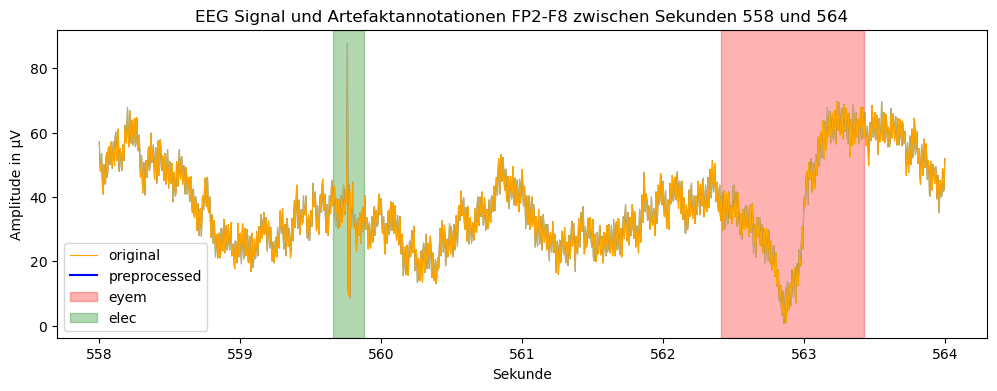

In [4]:
fig = visualize_eeg_with_artifacts(
    edf_file_path="../../../../tuar_processed/unsorted/aaaaagcs_s002_t000.edf",
    csv_file_path="../../../../tuar_processed/unsorted/aaaaagcs_s002_t000.csv",
    channel='FP2-F8',
    interval_start=558,
    interval_stop=564
)

axes = fig.get_axes()

with pyedflib.EdfReader('../../../../tuar/edf/02_tcp_le/aaaaagcs_s002_t000.edf') as reader:
    signal_labels = reader.getSignalLabels()
    fp2_idx = signal_labels.index('EEG FP2-LE')
    f8_idx = signal_labels.index('EEG F8-LE')
    fp2_f8_data = reader.readSignal(fp2_idx) - reader.readSignal(f8_idx)
    fs = reader.getSampleFrequency(fp2_idx)
    lower_bound = int(558 * fs)
    upper_bound = int(564 * fs)
    plot1, = axes[0].plot(np.arange(lower_bound, upper_bound) / fs, fp2_f8_data[lower_bound:upper_bound], color='orange', label='original', linewidth=0.8)
    # Quick and dirty solution to add legend entry for preprocessed data
    plot2, = axes[0].plot([], [], color='blue', label='preprocessed')
    axes[0].legend(handles=[plot1, plot2, Patch(facecolor='red', alpha=0.3, label='eyem', edgecolor='red'),
                             Patch(facecolor='green', alpha=0.3, label='elec', edgecolor='green')])
    reader.close()

fig.savefig("output/exp_02_06_artifact_2_in_1_2.svg")
fig.show()